# Clustering Based On Spending

In [8]:
# The aim of this problem is to segment the clients of a wholesale distributor based on their 
# annual spending on diverse product categories, like milk, grocery, region, etc

# reading data:
import pandas as pd
cust_data= pd.read_csv('https://raw.githubusercontent.com/Kash48/Clustering-Based-On-Spending/master/cust_data.csv')
cust_data.shape

(440, 8)

In [11]:
cust_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [13]:
# statistics of the data
x=cust_data.describe()
pd.DataFrame(x)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [14]:
#checking missing values:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [16]:
#Here, we see that there is a lot of variation in the magnitude of the data. 
#Variables like Channel and Region have low magnitude whereas 
#variables like Fresh, Milk, Grocery, etc. have a higher magnitude.

#Since K-Means is a distance-based algorithm, 
#this difference of magnitude can create a problem. 
#So let’s first bring all the variables to the same magnitude:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cust_data)

In [19]:
# statistics of scaled data
x=pd.DataFrame(data_scaled).describe()
x

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [21]:
#The magnitude looks similar now..Next, let’s create a kmeans function and fit it on the data:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, init='k-means++')

In [26]:
# fitting the k means algorithm on scaled data
y=kmeans.fit(data_scaled)
pred=kmeans.predict(data_scaled)
pred=pd.DataFrame(pred)
pred.columns=['pred_cluster']
new_ds=pd.concat([cust_data,pred], axis=1)
new_ds['pred_cluster'].value_counts()

0    304
1    136
Name: pred_cluster, dtype: int64

In [30]:
new_ds.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,pred_cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1


In [34]:
## elbow curve

# fitting multiple k-means algorithms and storing the values in an empty list
SSE=[]
for cluster in range(1,10):
    kmeans=KMeans(n_jobs=-1,n_clusters=cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\ProgramData\

Text(0,0.5,'Inertia')

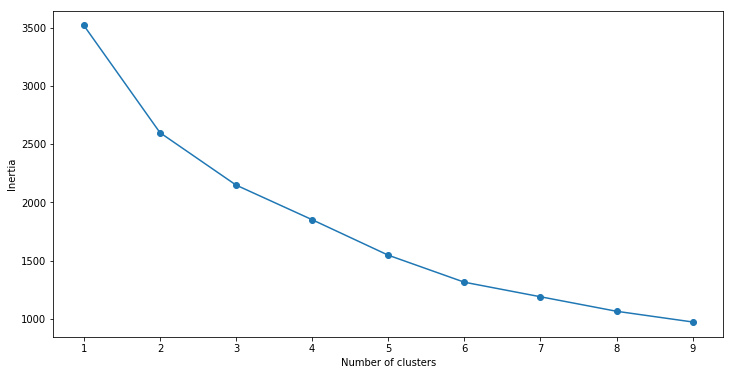

In [36]:
# converting the results into a dataframe and plotting them
frame=pd.DataFrame({'Cluster':range(1,10),'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'],frame['SSE'],marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [38]:
# Looking at the above elbow curve, we can choose any number of clusters between 5 to 8. Let’s set the number of clusters as 6 and fit the model:

# k means using 5 clusters and k-means++ initialization
kmeans=KMeans(n_jobs=-1, n_clusters=5, init='k-means++')
kmeans.fit(data_scaled)
pred=kmeans.predict(data_scaled)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


In [39]:
#let’s look at the value count of points in each of the above-formed clusters:

frame=pd.DataFrame(pred)
frame.columns=['cluster_no']
new_ds=pd.concat([cust_data,frame],axis=1)

new_ds['cluster_no'].value_counts()


2    212
4    125
1     91
3     11
0      1
Name: cluster_no, dtype: int64

In [42]:
#profiling clusters

df1=new_ds.query('(cluster_no==1)')
df1['Channel'].value_counts()
df1['Region'].value_counts()
x=df1.describe()
profiling_df1=pd.DataFrame(x)
profiling_df1

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_no
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.0
mean,1.054945,1.307692,12183.945055,3254.714286,4130.923077,3458.252747,860.263736,1149.934066,1.0
std,0.229135,0.464095,11005.915166,3646.698432,3270.262467,3526.290341,1207.212039,1077.414609,0.0
min,1.000000,1.000000,3.000000,258.000000,489.000000,91.000000,5.000000,7.000000,1.0
25%,1.000000,1.000000,4284.500000,1071.000000,1964.500000,980.000000,219.000000,450.500000,1.0
50%,1.000000,1.000000,9193.000000,1993.000000,2914.000000,2286.000000,402.000000,834.000000,1.0
75%,1.000000,2.000000,17130.000000,3816.500000,5298.500000,4660.000000,824.500000,1542.000000,1.0
max,2.000000,2.000000,56083.000000,23527.000000,16966.000000,18711.000000,5828.000000,6854.000000,1.0


In [43]:
#profiling clusters

df1=new_ds.query('(cluster_no==3)')
df1['Channel'].value_counts()
df1['Region'].value_counts()
x=df1.describe()
profiling_df1=pd.DataFrame(x)
profiling_df1

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_no
count,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0
mean,2.0,2.545455,16911.090909,34864.363636,46126.181818,3245.454545,23008.090909,4177.363636,3.0
std,0.0,0.820200,14011.871342,18324.931401,21074.341730,2629.102941,9980.368014,4499.752733,0.0
min,2.0,1.000000,85.000000,4980.000000,22019.000000,36.000000,4337.000000,903.000000,3.0
25%,2.0,2.500000,7349.500000,25302.500000,32074.000000,1006.500000,18750.000000,1381.500000,3.0
50%,2.0,3.000000,12119.000000,29892.000000,39694.000000,3232.000000,20070.000000,2870.000000,3.0
75%,2.0,3.000000,24649.000000,42283.000000,57584.500000,4945.000000,25466.000000,5125.500000,3.0
max,2.0,3.000000,44466.000000,73498.000000,92780.000000,7782.000000,40827.000000,16523.000000,3.0
